In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
players_id = ['65', '7768', '702', '2662', '5220']

fin_li = []

for i in players_id:

    li = []
    
    url = 'https://understat.com/player/'
    
    url += i
    
    res = requests.get(url) 
    soup = BeautifulSoup(res.content, "lxml") 
    scripts = soup.find_all('script')

    strings = scripts[4].string

    string_with_json_obj = '' 

    ind_start = strings.index("('")+2 
    ind_end = strings.index("')") 
    json_data = strings[ind_start:ind_end] 
    json_data = json_data.encode('utf8').decode('unicode_escape')

    data = json.loads(json_data)

    pl_shots = [i for i in data if i['season'] == '2020']
    
    r_new = 1000
    li = []

    for i in pl_shots:
        r_new = round(r_new + 32*(float(i['goals'])-float(i['xG'])), 2)
        li.append(r_new) 
        
    fin_li.append(li)

Text(0.9, 0.075, 'Data - Understat | @analyticfanatic')

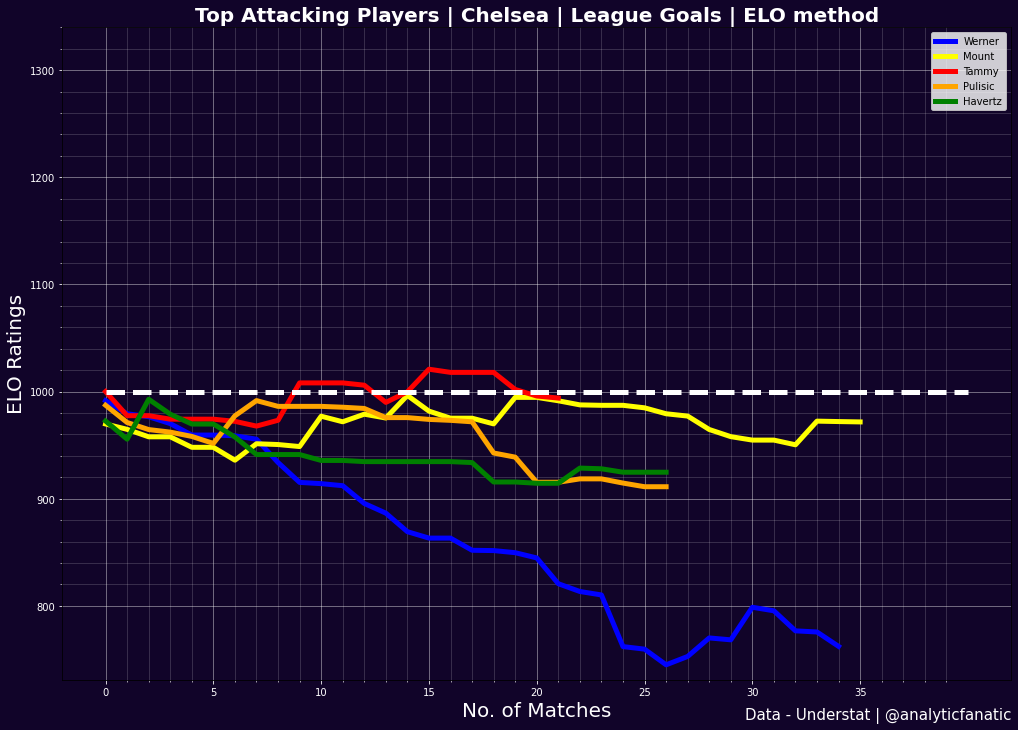

In [3]:
fig = plt.figure(figsize=[17,12])
fig.patch.set_facecolor('#110429')
fig.patch.set_alpha(1.0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#110429')
ax.patch.set_alpha(1.0)

lw = 5

ax.grid(True, color='black', alpha=0.2)
ax.plot(fin_li[0],label='Werner', color='blue', linewidth=lw)
ax.plot(fin_li[1],label='Mount', color='yellow', linewidth=lw)
ax.plot(fin_li[2],label='Tammy', color='red', linewidth=lw)
ax.plot(fin_li[3],label='Pulisic', color='orange', linewidth=lw)
ax.plot(fin_li[4],label='Havertz', color='green', linewidth=lw)
# ax.plot(fin_li[5],label='Lukaku', color='blue', linewidth=lw)
ax.legend(loc=1)

ax.plot([0, 40], [1000, 1000], color='white', linestyle='--', linewidth=lw)

grd = ax.grid(color="white", alpha=0.3, which="both")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white') 

plt.tick_params(axis='x', which='both' , colors='white')
plt.tick_params(axis='y', which='both', colors='white')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white') 

major_ticks = np.arange(800, 1350, 100)
minor_ticks = np.arange(800, 1350, 20)

major_ticks_x = np.arange(0, 40, 5)
minor_ticks_x = np.arange(0, 40, 1)

ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2, color="white")
ax.grid(which='major', alpha=0.5, color="white")

plt.title('Top Attacking Players | Chelsea | League Goals | ELO method', fontweight='bold', fontsize=20, color='white')

plt.xlabel('No. of Matches', color='white', fontsize=20)
plt.ylabel('ELO Ratings', color='white', fontsize=20)

fig.text(0.9, 0.075, 'Data - Understat | @analyticfanatic', verticalalignment='bottom', color='white', horizontalalignment='right',fontsize=15)

In [12]:
data

[{'goals': '1',
  'shots': '3',
  'xG': '1.6788227558135986',
  'time': '31',
  'position': 'Sub',
  'h_team': 'Inter',
  'a_team': 'Udinese',
  'h_goals': '5',
  'a_goals': '1',
  'date': '2021-05-23',
  'id': '15804',
  'season': '2020',
  'roster_id': '473232',
  'xA': '0',
  'assists': '0',
  'key_passes': '0',
  'npg': '1',
  'npxG': '1.6788227558135986',
  'xGChain': '1.8144770860671997',
  'xGBuildup': '0.13565431535243988'},
 {'goals': '1',
  'shots': '2',
  'xG': '0.8535600900650024',
  'time': '90',
  'position': 'FW',
  'h_team': 'Juventus',
  'a_team': 'Inter',
  'h_goals': '3',
  'a_goals': '2',
  'date': '2021-05-15',
  'id': '15790',
  'season': '2020',
  'roster_id': '471025',
  'xA': '0',
  'assists': '0',
  'key_passes': '0',
  'npg': '0',
  'npxG': '0.09226127713918686',
  'xGChain': '0.0560557022690773',
  'xGBuildup': '0.0560557022690773'},
 {'goals': '1',
  'shots': '2',
  'xG': '0.5023546814918518',
  'time': '90',
  'position': 'FW',
  'h_team': 'Inter',
  'a_te